This one has scans over large params

In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.95
mpl.rcParams['legend.scatterpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from common_plots import *

In [3]:
# Extract dataframes from binary
store = pd.HDFStore("points_500_MICRO_SCAN_NTv491_HBv431_HSv140_largeRange_02_May_16_1435.h5")
# df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly_ignorebctaunu_ignorechi2 #'relaxed' constraints - +ve g-2 and omegah^2

In [4]:
store.close()

In [5]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var

In [6]:
df_pass_all_ma1 = subset_var(df_pass_all, 3.5, 10.5, 'ma1')

In [7]:
print 'relaxed constraints:', len(df_pass_all.index) 
print 'With ma1 < 10.5:', len(df_pass_all_ma1.index)


relaxed constraints: 65897
With ma1 < 10.5: 1427


/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


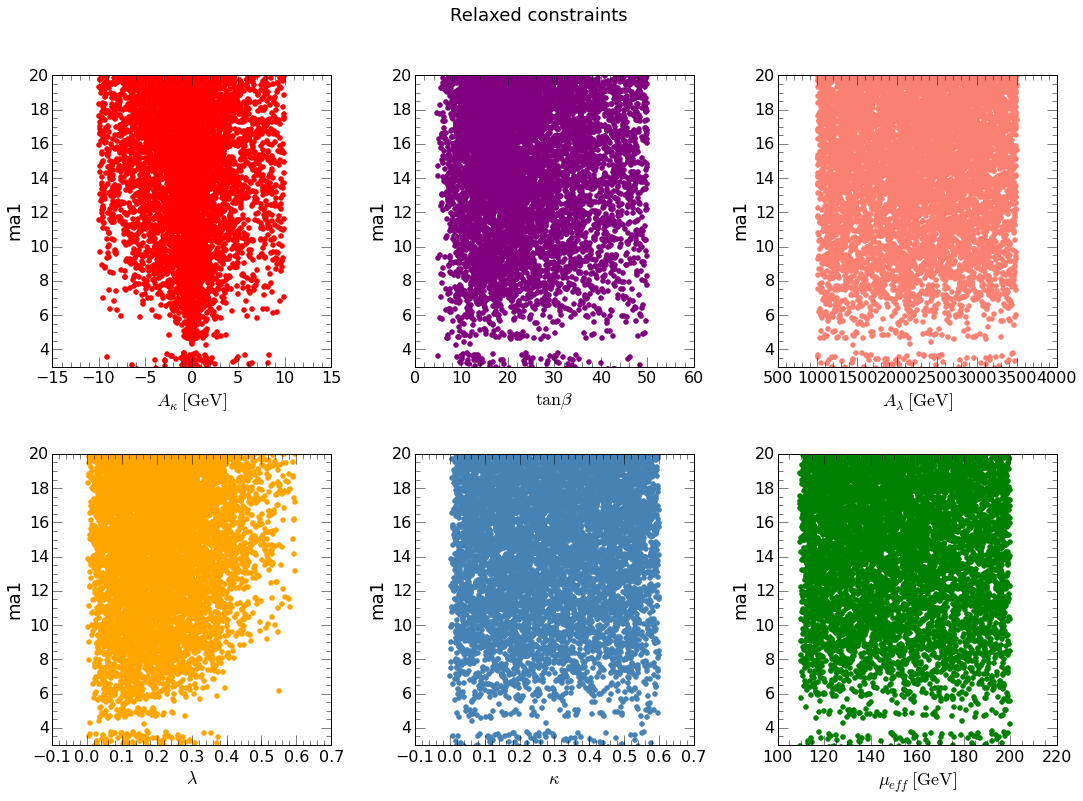

In [8]:
plot_input_params_scatters(df_pass_all, 'ma1', 'ma1', yrange=[3, 20], title='Relaxed constraints')

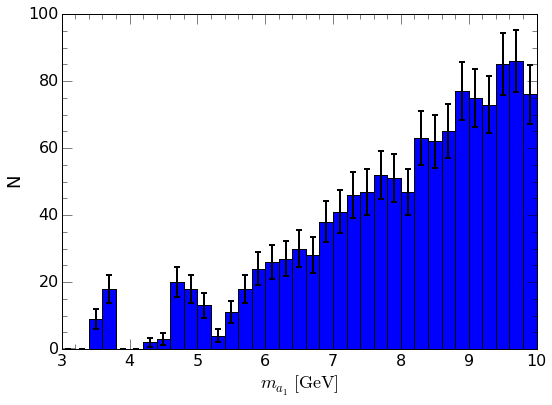

In [9]:
_ = plot_histogram(df=df_pass_all_ma1, var='ma1', range=[3, 10], bins=35, xlabel=r'$m_{a_1}\mathrm{\ [GeV]}$')

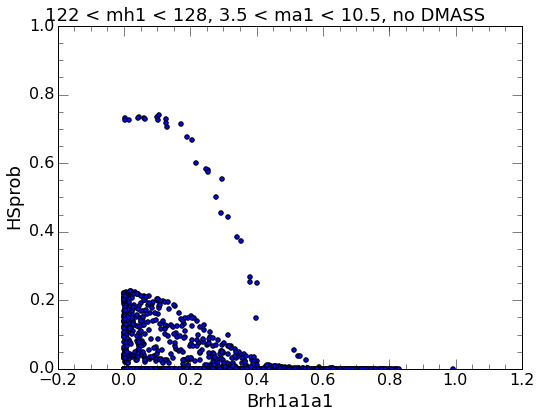

In [11]:
query_str = '122<mh1<128'

_ = plot_scatter(df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.0000].query(query_str), xvar='Brh1a1a1', yvar='HSprob')
plt.ylim(0, 1)
plt.suptitle('122 < mh1 < 128, 3.5 < ma1 < 10.5, no DMASS')

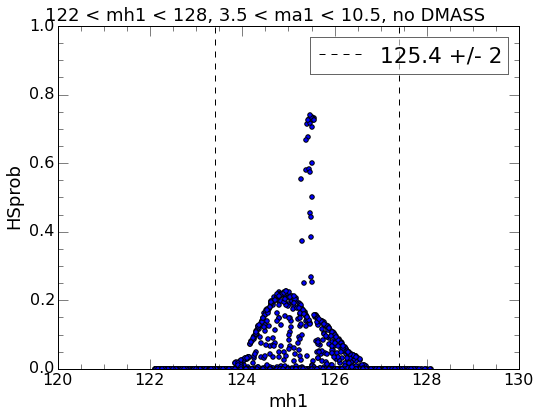

In [16]:
_ = plot_scatter(df=df_pass_all_ma1, xvar='mh1', yvar='HSprob')
plt.vlines([125.4-2, 125.4+2], 0, 1, linestyle='dashed', label='125.4 +/- 2')
plt.ylim(0, 1)
plt.legend(loc=0)
plt.xlim(120, 130)
plt.suptitle('122 < mh1 < 128, 3.5 < ma1 < 10.5, no DMASS')

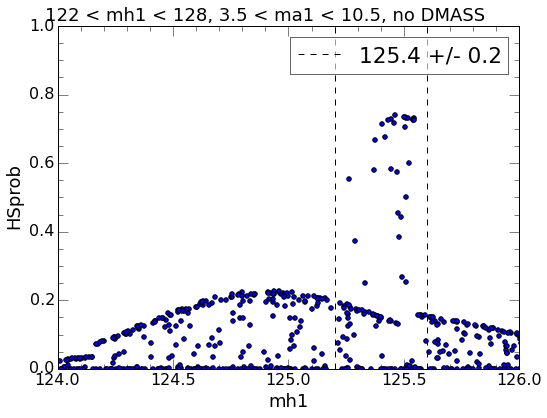

In [18]:
_ = plot_scatter(df=df_pass_all_ma1, xvar='mh1', yvar='HSprob')
plt.vlines([125.4-.2, 125.4+.2], 0, 1, linestyle='dashed', label='125.4 +/- 0.2')
plt.ylim(0, 1)
plt.legend(loc=0)
plt.xlim(124, 126)
plt.suptitle('122 < mh1 < 128, 3.5 < ma1 < 10.5, no DMASS')

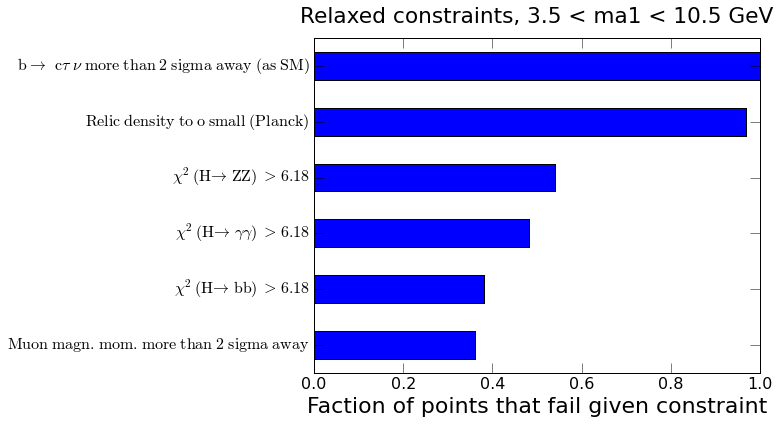

In [79]:
plot_constraints(df_pass_all_ma1, 'Relaxed constraints, 3.5 < ma1 < 10.5 GeV')

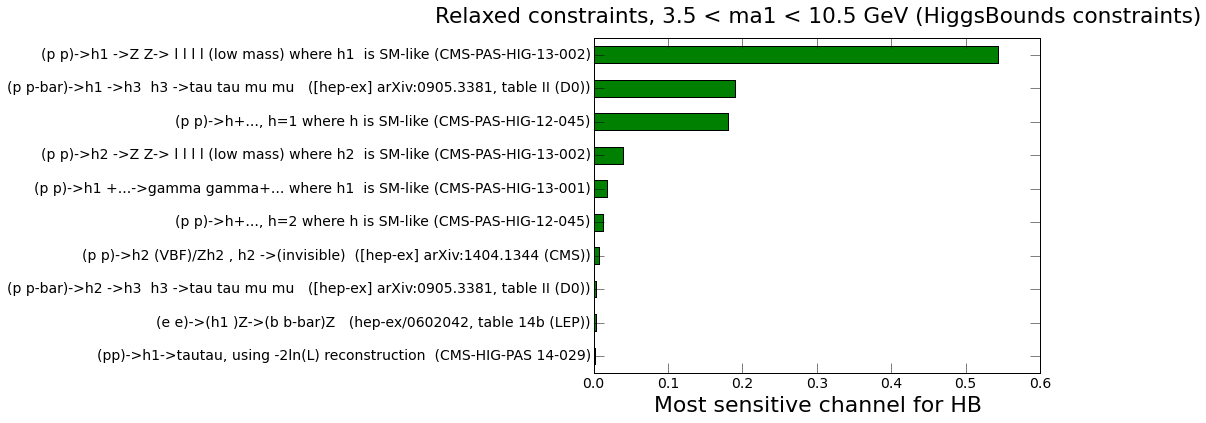

In [80]:
plot_constraints_HB(df_pass_all_ma1, 'Relaxed constraints, 3.5 < ma1 < 10.5 GeV (HiggsBounds constraints)')

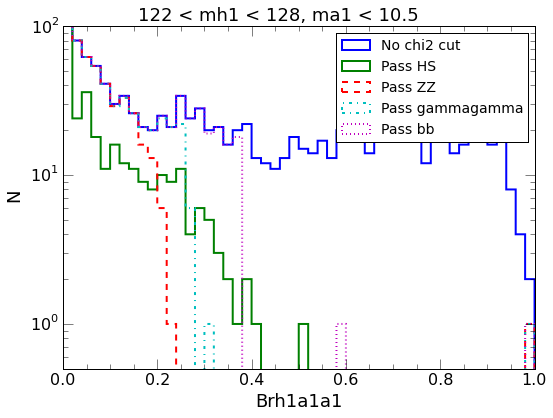

In [14]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass HS', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var='Brh1a1a1', bins=nbins, range=[0,1], histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)

plt.legend(loc=0, fontsize=14, framealpha=1)
plt.yscale('log')
plt.ylim(0.5, 100)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')

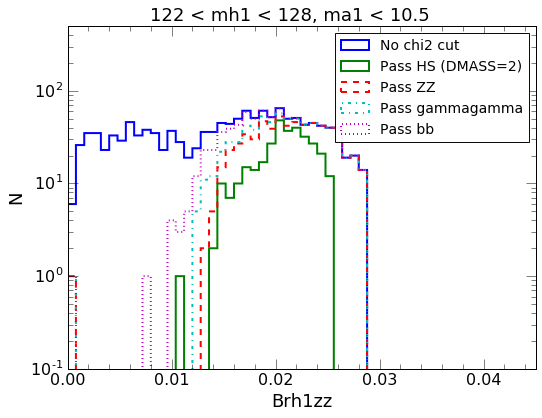

In [25]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
x_range = [0, 0.04]
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var='Brh1zz', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var='Brh1zz', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass HS (DMASS=2)', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var='Brh1zz', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var='Brh1zz', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var='Brh1zz', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)

plt.legend(loc=0, fontsize=14)
plt.yscale('log')
plt.ylim(0.1, 500)
# plt.xlim(0, 0.4)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')
set_major_tick_interval('X', 0.01)

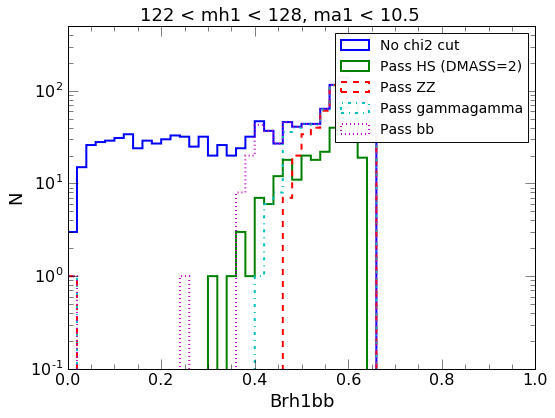

In [26]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
x_range = [0, 1]
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var='Brh1bb', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var='Brh1bb', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass HS (DMASS=2)', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var='Brh1bb', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var='Brh1bb', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var='Brh1bb', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)

plt.legend(loc=0, fontsize=14)
plt.yscale('log')
plt.ylim(0.1, 500)
# plt.xlim(0, 0.4)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')

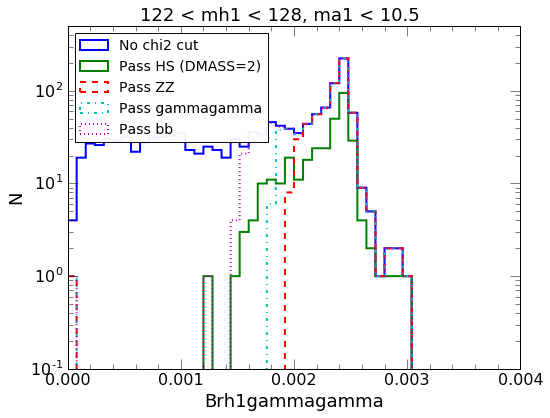

In [41]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
x_range = [0, 0.004]
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass HS (DMASS=2)', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)

plt.legend(loc=2, fontsize=14)
plt.yscale('log')
plt.ylim(0.1, 500)
# plt.xlim(0, 0.4)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')
set_major_tick_interval('x', 0.001)

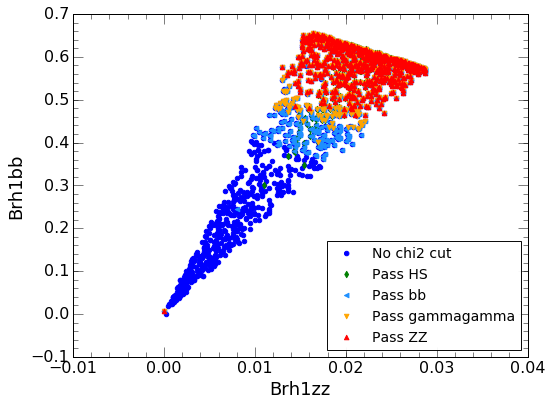

In [27]:
query = '122<mh1<128'
x_var = 'Brh1zz'
y_var = 'Brh1bb'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower right', fontsize=14)

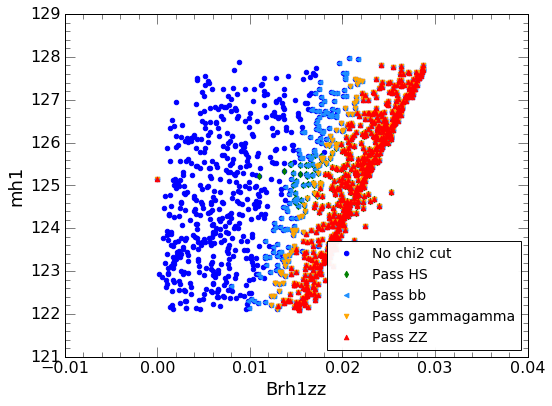

In [28]:
query = '122<mh1<128'
x_var = 'Brh1zz'
y_var = 'mh1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower right', fontsize=14)

(0, 0.03)

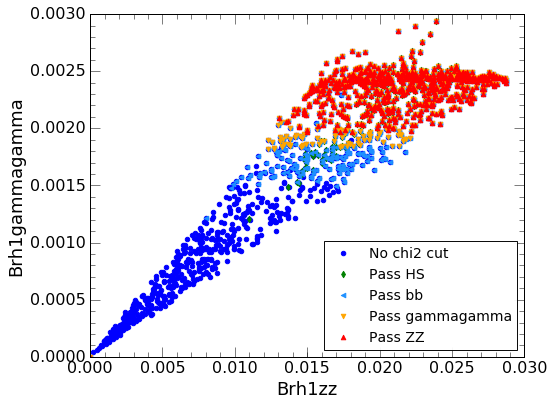

In [29]:
query = '122<mh1<128'
x_var = 'Brh1zz'
y_var = 'Brh1gammagamma'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower right', fontsize=14)
plt.ylim(0, 0.003)
plt.xlim(0, 0.03)

(0, 0.03)

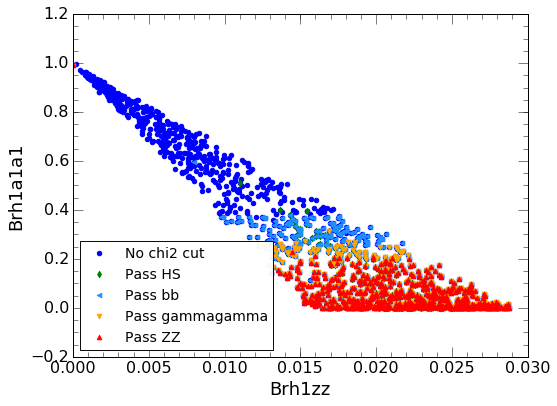

In [30]:
query = '122<mh1<128'
x_var = 'Brh1zz'
y_var = 'Brh1a1a1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower left', fontsize=14)
# plt.ylim(0, 0.003)
plt.xlim(0, 0.03)

(0, 0.003)

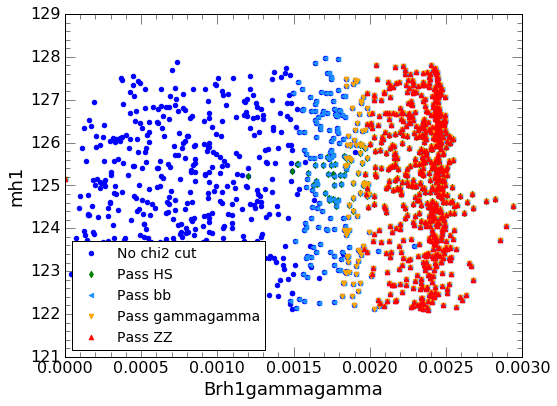

In [31]:
query = '122<mh1<128'
x_var = 'Brh1gammagamma'
y_var = 'mh1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower left', fontsize=14, framealpha=1)
plt.xlim(0, 0.003)
# plt.xlim(0, 0.03)

(0, 0.003)

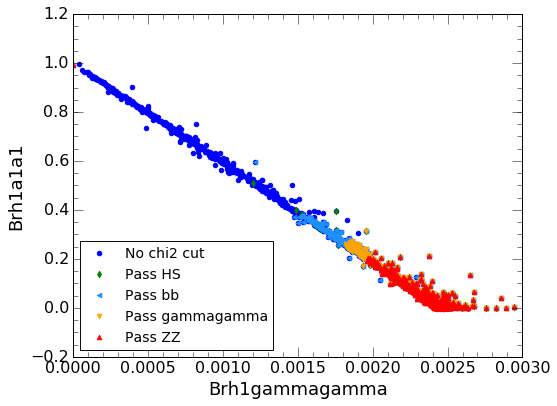

In [32]:
query = '122<mh1<128'
x_var = 'Brh1gammagamma'
y_var = 'Brh1a1a1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower left', fontsize=14)
plt.xlim(0, 0.003)
# plt.xlim(0, 0.03)

(0, 0.003)

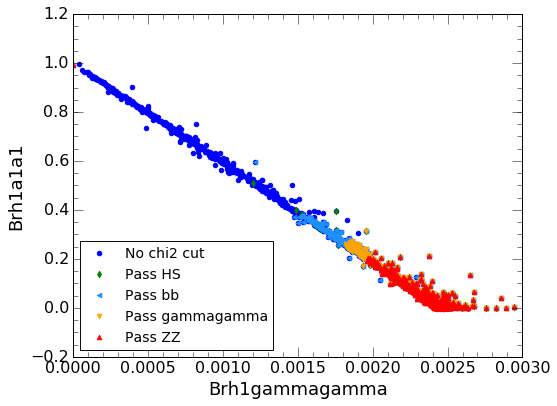

In [33]:
query = '122<mh1<128'
x_var = 'Brh1gammagamma'
y_var = 'Brh1a1a1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower left', fontsize=14)
plt.xlim(0, 0.003)
# plt.xlim(0, 0.03)

(0, 0.7)

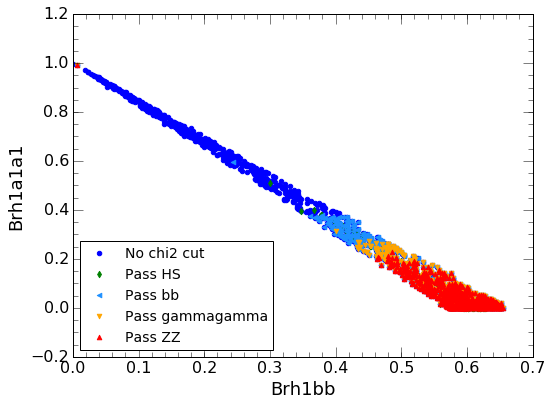

In [34]:
query = '122<mh1<128'
x_var = 'Brh1bb'
y_var = 'Brh1a1a1'
plot_scatter(df=df_pass_all_ma1.query(query_str), xvar=x_var, yvar=y_var, 
             color='blue', marker='o', label='No chi2 cut')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), xvar=x_var, yvar=y_var, 
             color='green', marker='d', label='Pass HS')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), xvar=x_var, yvar=y_var, 
             color='dodgerblue', marker='<', label='Pass bb')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), xvar=x_var, yvar=y_var, 
             color='orange', marker='v', label='Pass gammagamma')
plot_scatter(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), xvar=x_var, yvar=y_var, 
             color='red', marker='^', label='Pass ZZ')
plt.legend(loc='lower left', fontsize=14, framealpha=1)
# plt.ylim(0, 0.003)
plt.xlim(0, 0.7)

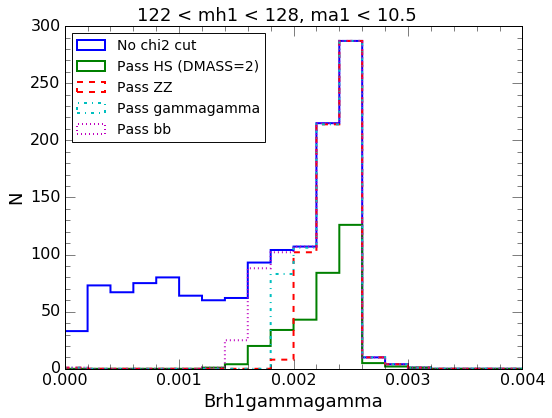

In [35]:
errbars = False
query_str = '122<mh1<128'
nbins = 50
x_range = [0, 0.01]
_ = plot_histogram(df=df_pass_all_ma1.query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='No chi2 cut', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass HS (DMASS=2)', linewidth=2)

_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass ZZ', linestyle='dashed', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('gg')].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass gammagamma', linestyle='dashdot', linewidth=2)
_ = plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('bb')].query(query_str), 
                   var='Brh1gammagamma', bins=nbins, range=x_range, histtype='step', errorbars=errbars, label='Pass bb', linestyle='dotted', linewidth=2)

plt.legend(loc=2, fontsize=14)
# plt.yscale('log')
# plt.ylim(0.1, 500)
plt.xlim(0, 0.004)
plt.suptitle('122 < mh1 < 128, ma1 < 10.5')

set_major_tick_interval('X', 0.001)

(120, 130)

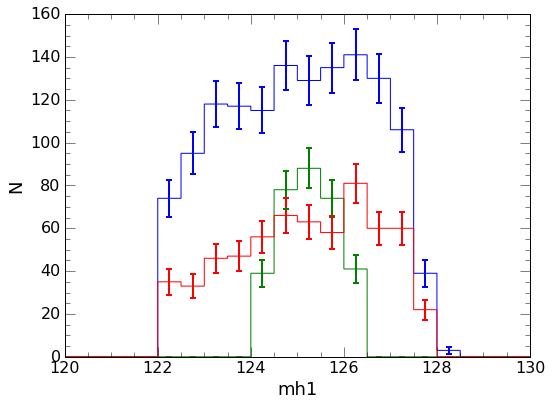

In [36]:
x_range = [120, 130]
nbins=20
plot_histogram(df=df_pass_all_ma1, 
               var='mh1', color='blue', range=x_range, histtype='step', bins=nbins, label='No chi2')
plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[df_pass_all_ma1.HSprob>0.05], 
             var='mh1', color='green', range=x_range, histtype='step', bins=nbins, label='Pass HS')
plot_histogram(ax=plt.gca(), df=df_pass_all_ma1[~df_pass_all_ma1.constraints.str.contains('ZZ')], 
             var='mh1', color='red', range=x_range, histtype='step', bins=nbins, label='Pass ZZ')
# plt.ylim(top=50)
plt.xlim(120, 130)

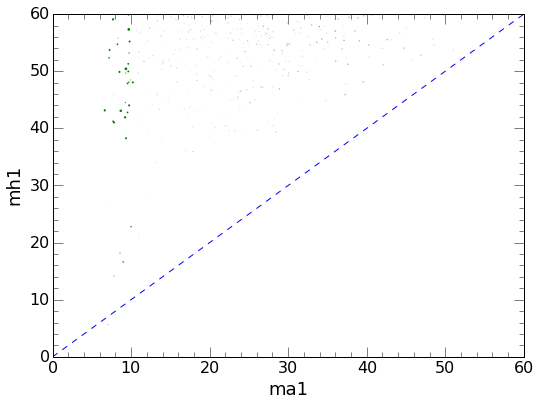

In [82]:
plot_scatter(df=df_pass_all, xvar='ma1', yvar='mh1', color='green', s=df_pass_all.xsec_8_ggf_h2_2a1_4tau.values+df_pass_all.xsec_8_ggf_h2_2h1_4tau.values)
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.plot([0, 60], [0, 60], linestyle='dashed')

In [83]:
# We need to divide up the dataset into several groupings:
# - pass NT chi2 or fail
# - pass HS chi2 or fail
# - pass HB or fail

fail_NT_chi2 = df_pass_all.constraints.str.contains('chi2')
pass_NT_chi2 = ~ fail_NT_chi2

fail_HS = df_pass_all.HSprob < 0.05
pass_HS = ~fail_HS

fail_HB = df_pass_all.HBresult == 0
pass_HB = ~fail_HB

In [84]:
pass_gm2 = ~df_pass_all.constraints.str.contains('Muon')
pass_relic = ~df_pass_all.constraints.str.contains('Relic')

In [85]:
df_fail_NT_fail_HS_fail_HB = df_pass_all[fail_NT_chi2 & fail_HS & fail_HB]
df_fail_NT_fail_HS_pass_HB = df_pass_all[fail_NT_chi2 & fail_HS & pass_HB]

df_fail_NT_pass_HS_fail_HB = df_pass_all[fail_NT_chi2 & pass_HS & fail_HB]
df_fail_NT_pass_HS_pass_HB = df_pass_all[fail_NT_chi2 & pass_HS & pass_HB]

df_pass_NT_pass_HS_fail_HB = df_pass_all[pass_NT_chi2 & pass_HS & fail_HB]
df_pass_NT_pass_HS_pass_HB = df_pass_all[pass_NT_chi2 & pass_HS & pass_HB]
df_pass_NT_fail_HS_fail_HB = df_pass_all[pass_NT_chi2 & fail_HS & fail_HB]
df_pass_NT_fail_HS_pass_HB = df_pass_all[pass_NT_chi2 & fail_HS & pass_HB]

In [86]:
print 'Fail NT, fail HS, fail HB:', len(df_fail_NT_fail_HS_fail_HB.index)
print 'Fail NT, fail HS, pass HB:', len(df_fail_NT_fail_HS_pass_HB.index)
print 'Fail NT, pass HS, fail HB:', len(df_fail_NT_pass_HS_fail_HB.index)
print 'Fail NT, pass HS, pass HB:', len(df_fail_NT_pass_HS_pass_HB.index)
print 'Pass NT, pass HS, fail HB:', len(df_pass_NT_pass_HS_fail_HB.index)
print 'Pass NT, pass HS, pass HB:', len(df_pass_NT_pass_HS_pass_HB.index)
print 'Pass NT, fail HS, fail HB:', len(df_pass_NT_fail_HS_fail_HB.index)
print 'Pass NT, fail HS, pass HB:', len(df_pass_NT_fail_HS_pass_HB.index)

Fail NT, fail HS, fail HB: 503
Fail NT, fail HS, pass HB: 32222
Fail NT, pass HS, fail HB: 1
Fail NT, pass HS, pass HB: 2697
Pass NT, pass HS, fail HB: 0
Pass NT, pass HS, pass HB: 12301
Pass NT, fail HS, fail HB: 463
Pass NT, fail HS, pass HB: 17710


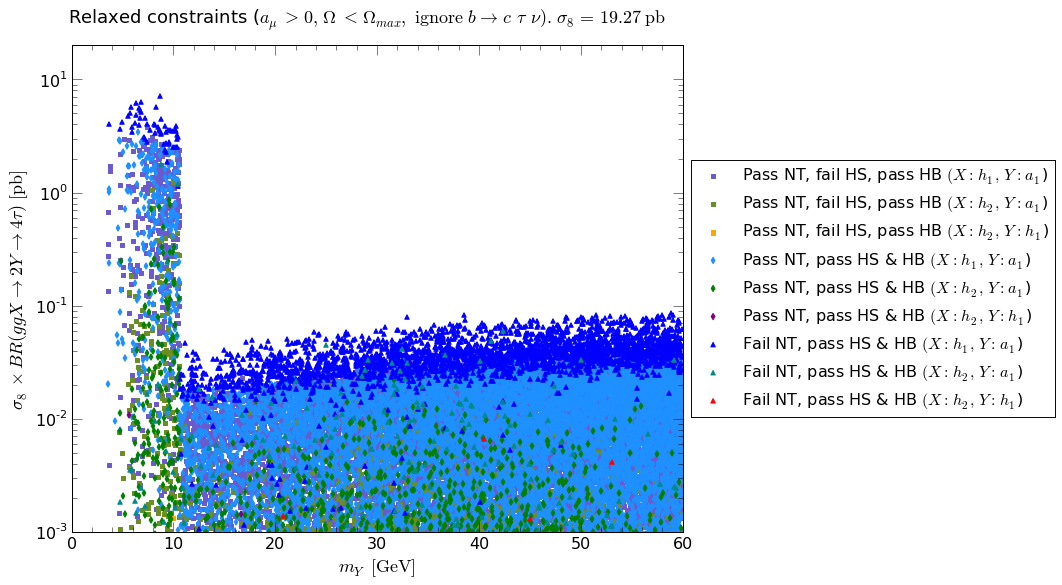

In [87]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4tau' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4tau' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4tau' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])


# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Fail NT, fail HS, pass HB ' + lab_h1a1, 
#                  color='slateblue', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Fail NT, fail HS, pass HB ' + lab_h2a1, 
#                  color='olivedrab', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2h1, label='Fail NT, fail HS, pass HB ' + lab_h2h1, 
#                  color='orange', marker='o')


_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS, pass HB ' + lab_h1a1, 
                 color='slateblue', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS, pass HB ' + lab_h2a1, 
                 color='olivedrab', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2h1, label='Pass NT, fail HS, pass HB ' + lab_h2h1, 
                 color='orange', marker='s')

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
#                  color='cyan', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
#                  color='lime', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
#                  color='magenta', marker='v')



box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.legend(loc='center left', fontsize=16, framealpha=0.95, bbox_to_anchor=(1, 0.5))
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4\tau)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 20)
plt.xlim(0, 60)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

(<matplotlib.axes._subplots.AxesSubplot at 0x11de63650>,
 <matplotlib.collections.PathCollection at 0x11259c510>)

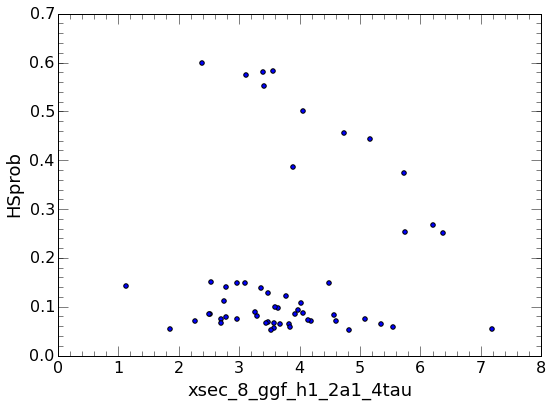

In [88]:
plot_scatter(df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>0.1'), xvar='xsec_8_ggf_h1_2a1_4tau', yvar='HSprob')

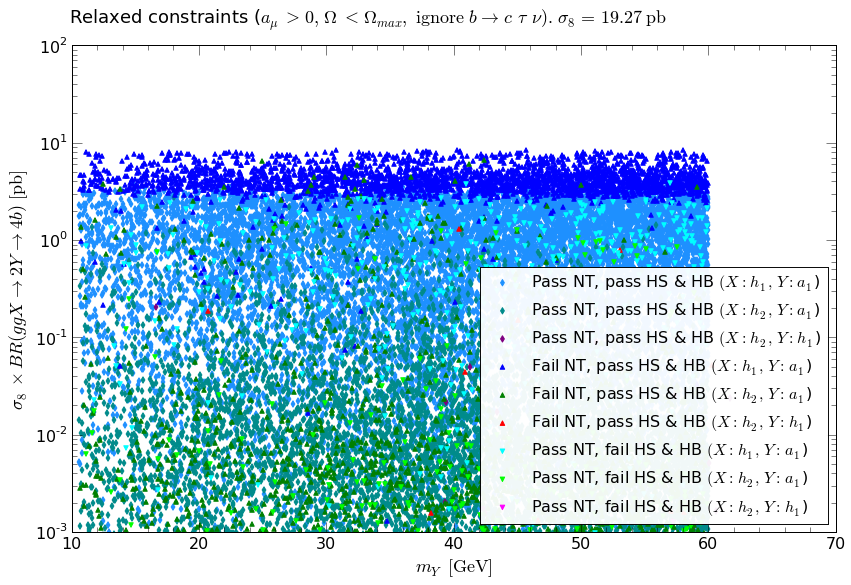

In [89]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4b' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4b' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4b' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
                 color='cyan', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
                 color='lime', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
                 color='magenta', marker='v')

plt.legend(loc=4, fontsize=16, framealpha=0.95)
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4b)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 100)
plt.xlim(10, 70)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

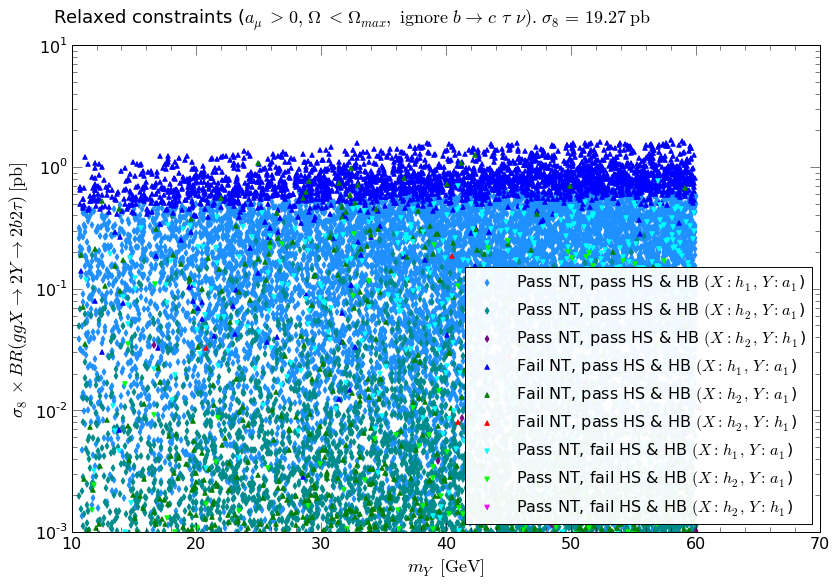

In [90]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_2b2tau' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_2b2tau' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_2b2tau' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
                 color='cyan', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
                 color='lime', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
                 color='magenta', marker='v')

plt.legend(loc=4, fontsize=16, framealpha=0.95)
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 2b2\tau)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 10)
plt.xlim(10, 70)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

In [91]:
# Save to CSV for portability
import os
odir = 'range_large_final_relaxed'
if not os.path.isdir(odir):
    os.makedirs(odir)
col_list=['ma1', 'mh1', 'mh2', 
          'xsec_8_ggf_h1_2a1_4tau', 'xsec_8_ggf_h2_2a1_4tau', 'xsec_8_ggf_h2_2h1_4tau', 
          'xsec_8_ggf_h1_2a1_4b', 'xsec_8_ggf_h2_2a1_4b', 'xsec_8_ggf_h2_2h1_4b', 
          'xsec_8_ggf_h1_2a1_2b2tau', 'xsec_8_ggf_h2_2a1_2b2tau', 'xsec_8_ggf_h2_2h1_2b2tau',
          'xsec_8_ggf_h1_2a1_2tau2mu', 'xsec_8_ggf_h2_2a1_2tau2mu', 'xsec_8_ggf_h2_2h1_2tau2mu',
          'xsec_8_ggf_h1_2a1_4mu', 'xsec_8_ggf_h2_2a1_4mu', 'xsec_8_ggf_h2_2h1_4mu']


df_fail_NT_fail_HS_fail_HB.to_csv(os.path.join(odir, 'df_fail_NT_fail_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_fail_HS_pass_HB.to_csv(os.path.join(odir, 'df_fail_NT_fail_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_pass_HS_fail_HB.to_csv(os.path.join(odir, 'df_fail_NT_pass_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_pass_HS_pass_HB.to_csv(os.path.join(odir, 'df_fail_NT_pass_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_pass_HS_fail_HB.to_csv(os.path.join(odir, 'df_pass_NT_pass_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_pass_HS_pass_HB.to_csv(os.path.join(odir, 'df_pass_NT_pass_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_fail_HS_fail_HB.to_csv(os.path.join(odir, 'df_pass_NT_fail_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_fail_HS_pass_HB.to_csv(os.path.join(odir, 'df_pass_NT_fail_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)

In [92]:
df_fail_NT_fail_HS_fail_HB[col_list].query('ma1<4')

,ma1,mh1,mh2,xsec_8_ggf_h1_2a1_4tau,xsec_8_ggf_h2_2a1_4tau,xsec_8_ggf_h2_2h1_4tau,xsec_8_ggf_h1_2a1_4b,xsec_8_ggf_h2_2a1_4b,xsec_8_ggf_h2_2h1_4b,xsec_8_ggf_h1_2a1_2b2tau,xsec_8_ggf_h2_2a1_2b2tau,xsec_8_ggf_h2_2h1_2b2tau,xsec_8_ggf_h1_2a1_2tau2mu,xsec_8_ggf_h2_2a1_2tau2mu,xsec_8_ggf_h2_2h1_2tau2mu,xsec_8_ggf_h1_2a1_4mu,xsec_8_ggf_h2_2a1_4mu,xsec_8_ggf_h2_2h1_4mu
434070,3.67386,125.078012,417.720138,12.794814,0.000017,8.883683e-16,NaN,NaN,7.406461e-14,NaN,NaN,1.622303e-14,0.356509,4.844911e-07,6.289176e-18,0.002483,3.374913e-09,1.113101e-20
